In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sys

# Step 1: Read the RGB Excel file into a pandas DataFrame
file_path = ('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/RGB.xlsx')
df = pd.read_excel(file_path)
#df.head()
#print(df)

In [2]:
df['1/Time'] = 1 / df['Time']


time = df['Time']
R = df['R']
G = df['G']
B = df['B']
VEG = df['VEG']
L = df['L']
a = df['a']
b = df['b']
DeltaE = df['DeltaE']
CIVE = df['CIVE']
VEG = df['VEG']
ExG = df['ExG']
ExGR = df['ExGR']
COM = df['COM']
BI = df['BI']
WI = df['WI']
ISO_B = df['ISO_B']
Hunter_WI = df['Hunter_WI']
Hue = df['Hue']
Chrome_rad = df['Chrome_rad']
Chrome_deg = df['Chrome_deg']
Area = df['Area']
Feret = df['Feret']



Time_p = df['Time_p']
R_p = df['R_p']
G_p = df['G_p']
B_p = df['B_p']
VEG_p = df['VEG_p']
L_p= df['L_p']
a_p = df['a_p']
b_p = df['b_p']
DeltaE_P = df['DeltaE_p']
CIVE_p = df['CIVE_p']
VEG_p = df['VEG_p']
ExG_p = df['ExG_p']
ExGR_p = df['ExGR_p']
COM_p = df['COM_p']
BI_p = df['BI_p']
WI_p = df['WI_p']
ISO_B_p = df['ISO_B_p']
Hunter_WI_p = df['Hunter_WI_p']
Hue_p = df['Hue_p']
Chrome_rad_p = df['Chrome_rad_p']
Chrome_deg_p = df['Chrome_deg_p']
Area_p = df['Area_p']
Feret_p = df['Feret_p']

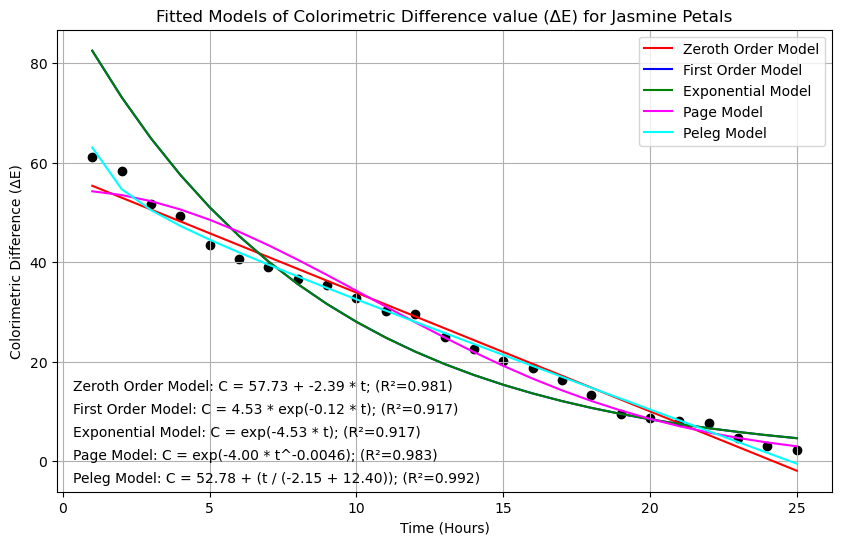

In [3]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(DeltaE, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(DeltaE), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(DeltaE), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[1]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(DeltaE), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(DeltaE, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, DeltaE, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Colorimetric Difference value (\u0394E) for Jasmine Petals')
plt.xlabel('Time (Hours)')
plt.ylabel('Colorimetric Difference (\u0394E)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.02 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/DeltaE.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/DeltaE_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/DeltaE_summary.txt'")


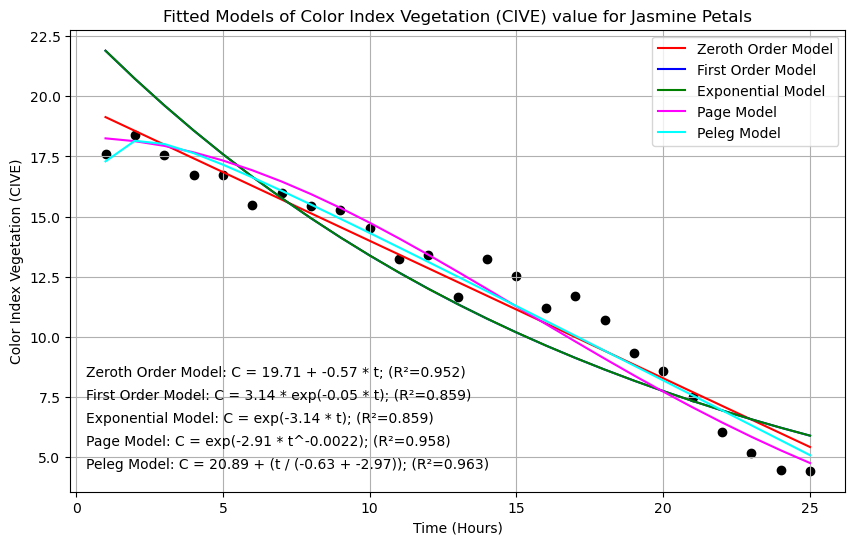

In [4]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(CIVE, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(CIVE), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(CIVE), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(CIVE), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(CIVE, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, CIVE, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Color Index Vegetation (CIVE) value for Jasmine Petals')
plt.xlabel('Time (Hours)')
plt.ylabel('Color Index Vegetation (CIVE)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/CIVE.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/CIVE_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/CIVE_summary.txt'")


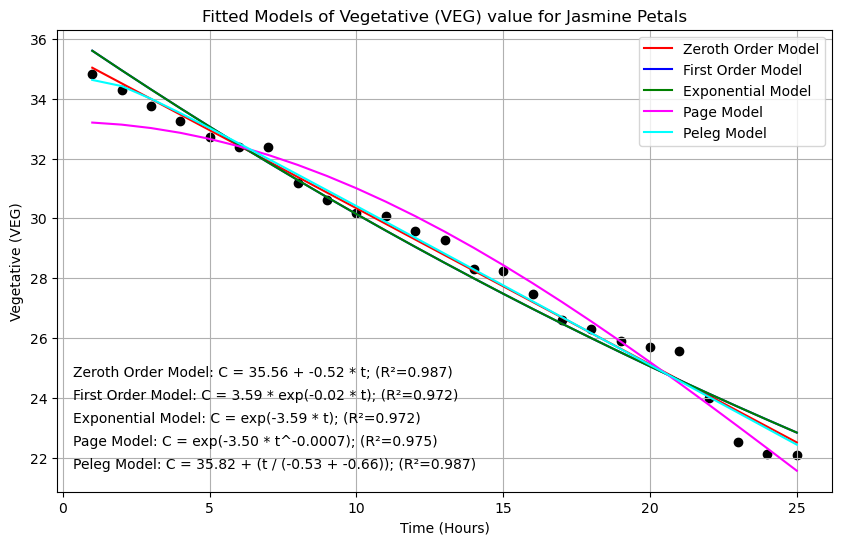

In [5]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(VEG, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(VEG), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(VEG), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(VEG), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(VEG, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, VEG, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Vegetative (VEG) value for Jasmine Petals')
plt.xlabel('Time (Hours)')
plt.ylabel('Vegetative (VEG)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/VEG.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/VEG_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/VEG_summary.txt'")


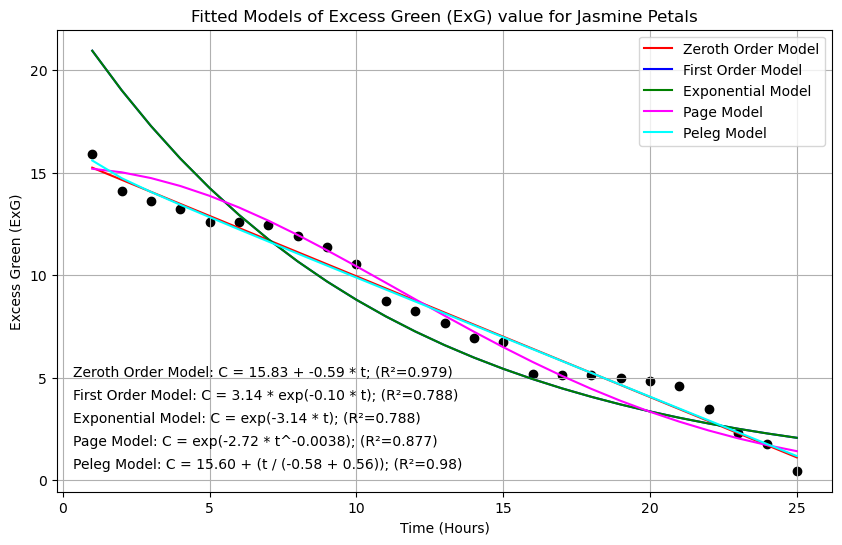

In [6]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(ExG, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(ExG), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(ExG), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(ExG), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(ExG, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, ExG, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Excess Green (ExG) value for Jasmine Petals')
plt.xlabel('Time (Hours)')
plt.ylabel('Excess Green (ExG)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ExG.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ExG_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ExG_summary.txt'")


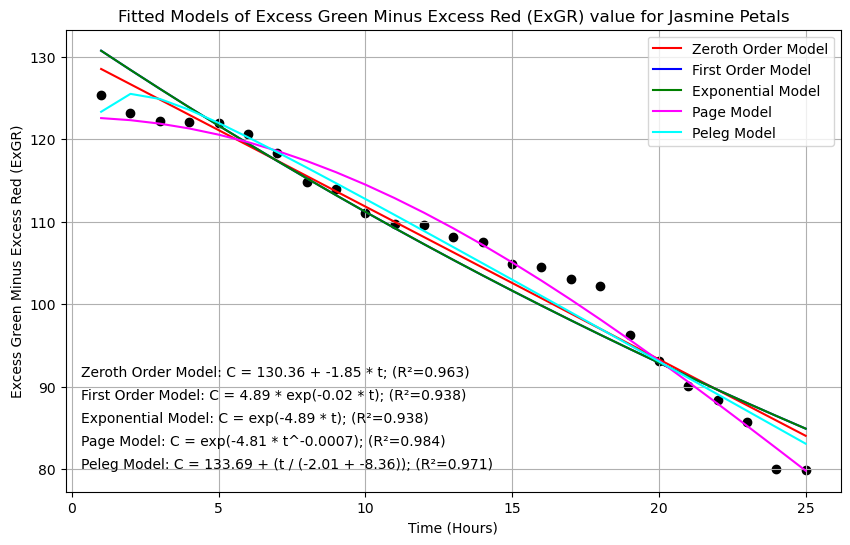

In [7]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(ExGR, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(ExGR), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(ExGR), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(ExGR), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(ExGR, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, ExGR, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Excess Green Minus Excess Red (ExGR) value for Jasmine Petals')
plt.xlabel('Time (Hours)')
plt.ylabel('Excess Green Minus Excess Red (ExGR)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ExGR.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ExGR_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ExGR_summary.txt'")


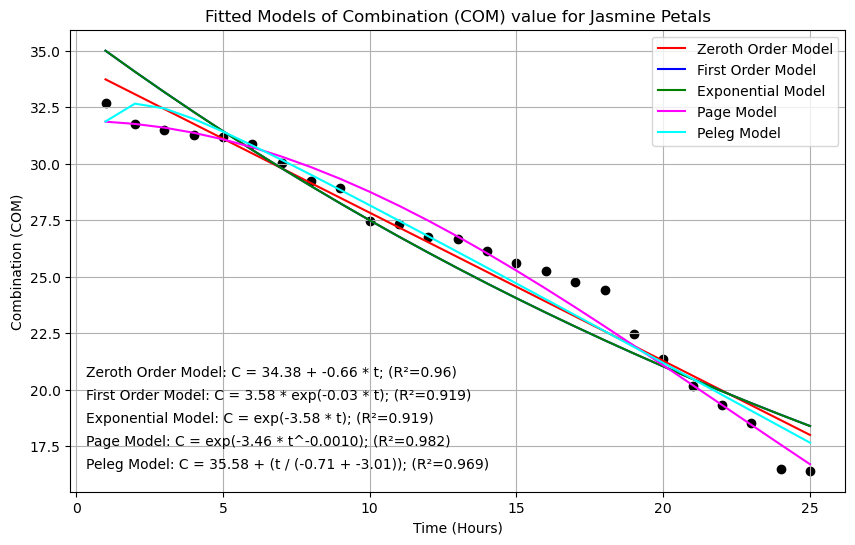

In [8]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(COM, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(COM), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(COM), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(COM), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(COM, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, COM, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Combination (COM) value for Jasmine Petals')
plt.xlabel('Time (Hours)')
plt.ylabel('Combination (COM)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/COM.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/COM_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/COM_summary.txt'")


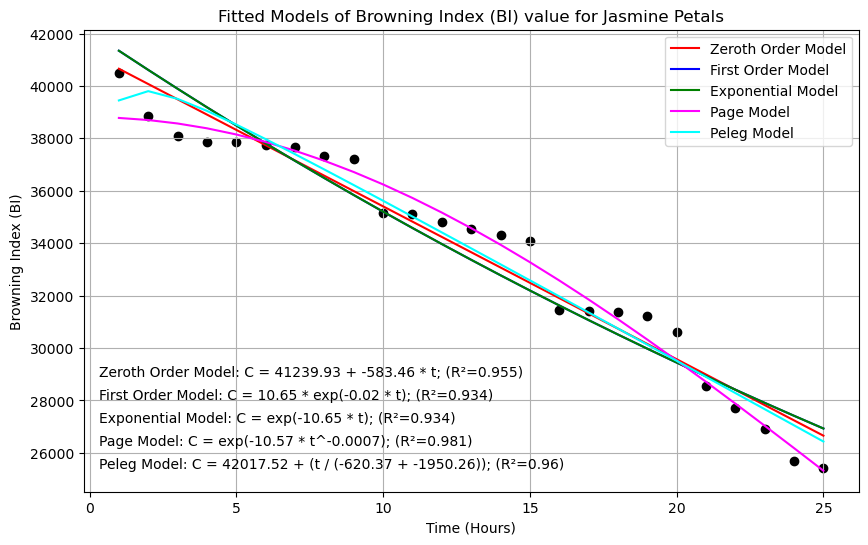

In [27]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(BI, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(BI), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(BI), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(BI), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(BI, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, BI, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Browning Index (BI) value for Jasmine Petals')
plt.xlabel('Time (Hours)')
plt.ylabel('Browning Index (BI)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/BI.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/BI_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/BI_summary.txt'")


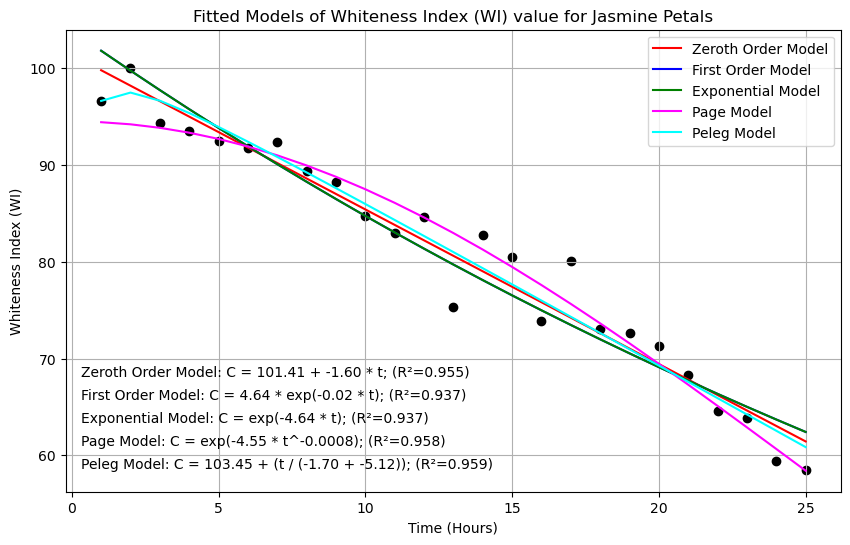

In [28]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(WI, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(WI), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(WI), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(WI), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(WI, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, WI, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Whiteness Index (WI) value for Jasmine Petals')
plt.xlabel('Time (Hours)')
plt.ylabel('Whiteness Index (WI)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/WI.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/WI_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/WI_summary.txt'")


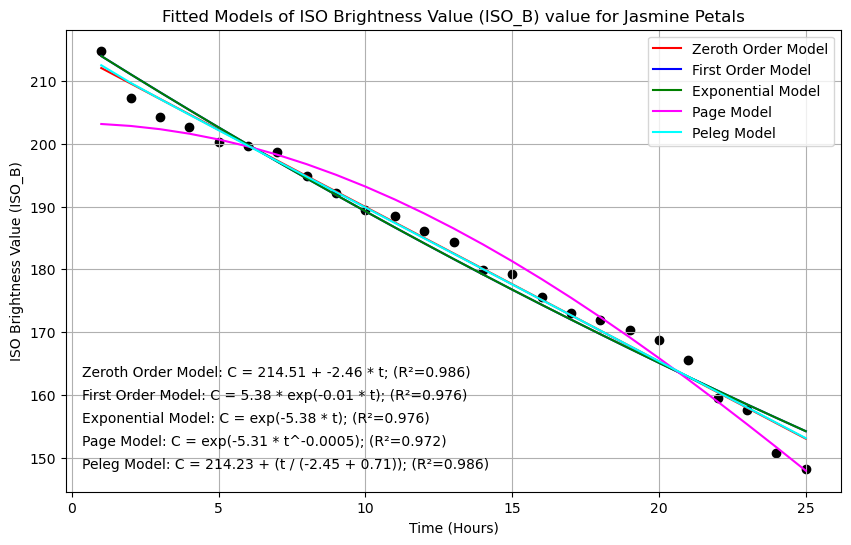

In [11]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(ISO_B, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(ISO_B), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(ISO_B), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(ISO_B), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(ISO_B, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, ISO_B, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of ISO Brightness Value (ISO_B) value for Jasmine Petals')
plt.xlabel('Time (Hours)')
plt.ylabel('ISO Brightness Value (ISO_B)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ISO_B.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ISO_B_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ISO_B_summary.txt'")


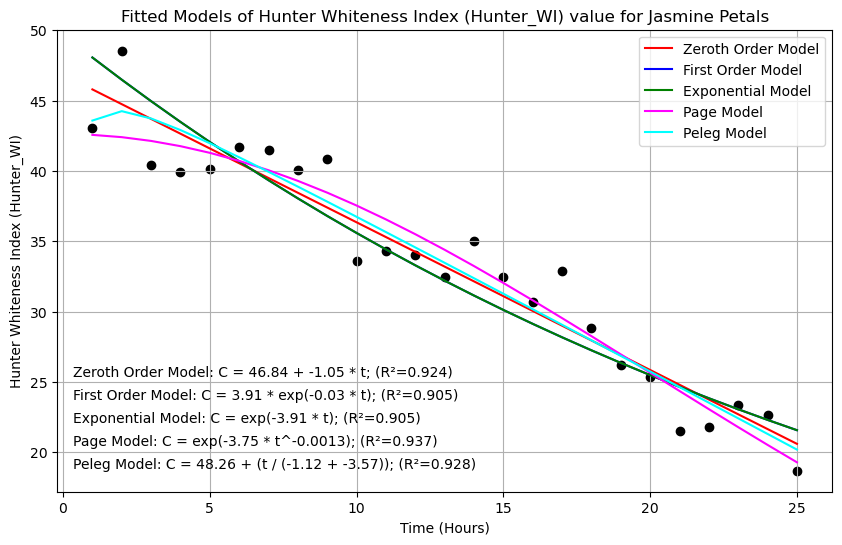

In [12]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(Hunter_WI, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(Hunter_WI), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(Hunter_WI), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(Hunter_WI), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(Hunter_WI, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, Hunter_WI, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Hunter Whiteness Index (Hunter_WI) value for Jasmine Petals')
plt.xlabel('Time (Hours)')
plt.ylabel('Hunter Whiteness Index (Hunter_WI)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Hunter_WI.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Hunter_WI_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Hunter_WI_summary.txt'")


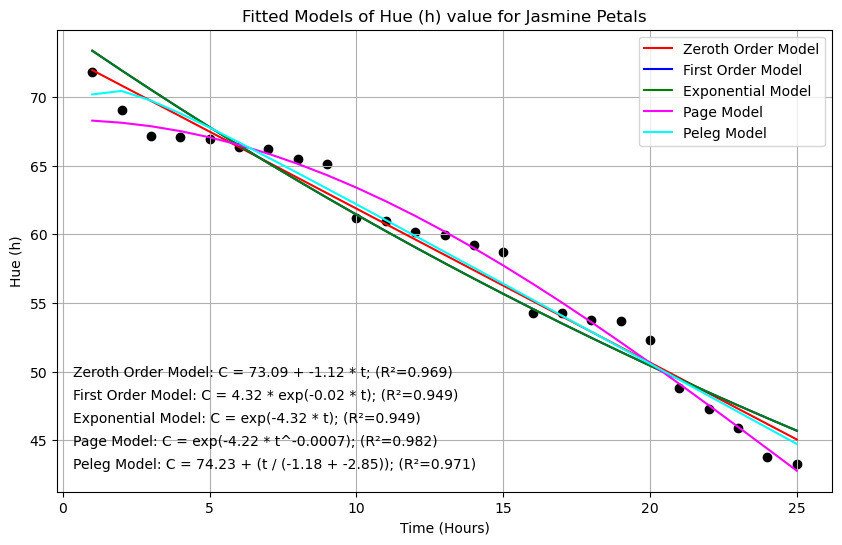

In [13]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(Hue, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(Hue), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(Hue), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(Hue), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(Hue, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, Hue, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Hue (h) value for Jasmine Petals')
plt.xlabel('Time (Hours)')
plt.ylabel('Hue (h)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Hue.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Hue_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Hue_summary.txt'")


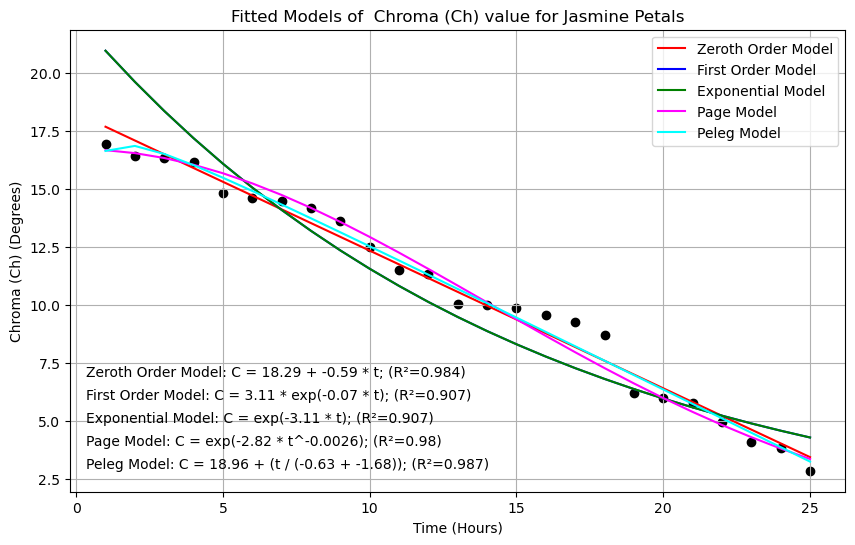

In [14]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(Chrome_deg, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(Chrome_deg), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(Chrome_deg), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(Chrome_deg), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(Chrome_deg, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, Chrome_deg, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of  Chroma (Ch) value for Jasmine Petals')
plt.xlabel('Time (Hours)')
plt.ylabel('Chroma (Ch) (Degrees)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Chrome_deg.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Chrome_deg_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Chrome_deg_summary.txt'")


## PLOTS FOR PEDICILES

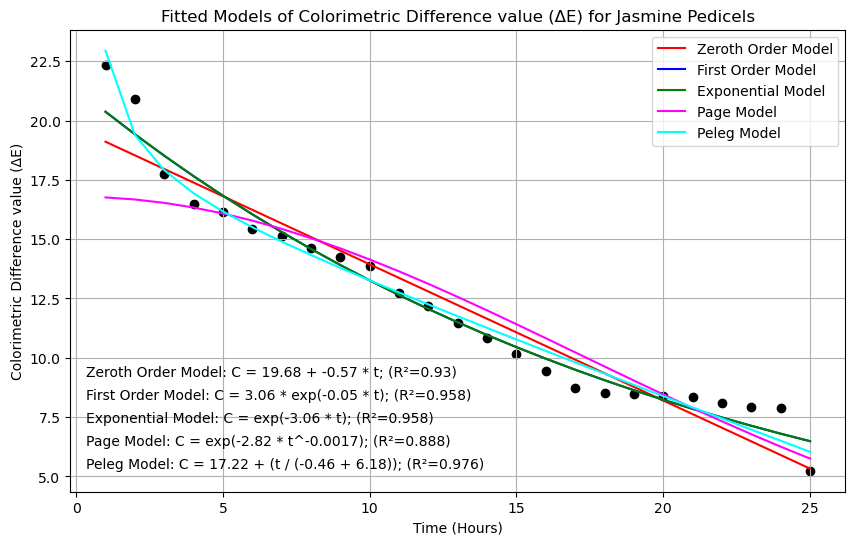

In [15]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(DeltaE_P, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(DeltaE_P), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(DeltaE_P), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[1]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(DeltaE_P), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(DeltaE_P, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, DeltaE_P, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Colorimetric Difference value (\u0394E) for Jasmine Pedicels')
plt.xlabel('Time (Hours)')
plt.ylabel('Colorimetric Difference value (\u0394E)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/DeltaE_P.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/DeltaE_P_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/DeltaE_P_summary.txt'")


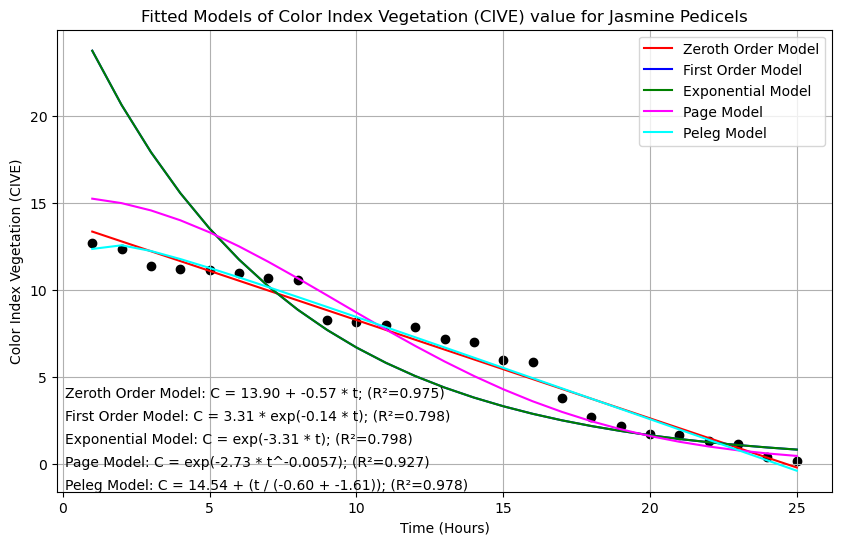

In [16]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(CIVE_p, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(CIVE_p), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(CIVE_p), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(CIVE_p), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(CIVE_p, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, CIVE_p, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Color Index Vegetation (CIVE) value for Jasmine Pedicels')
plt.xlabel('Time (Hours)')
plt.ylabel('Color Index Vegetation (CIVE)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.01, 0.005 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/CIVE_p.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/CIVE_p_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/CIVE_p_summary.txt'")


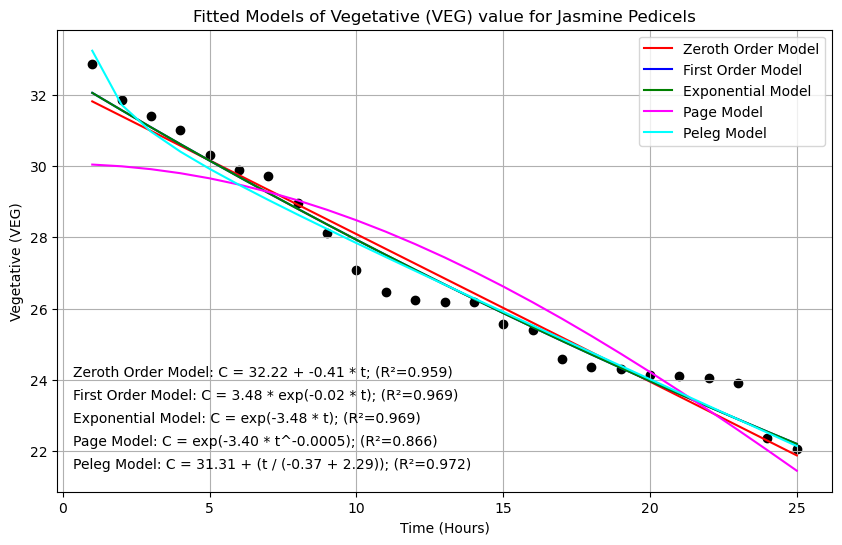

In [17]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(VEG_p, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(VEG_p), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(VEG_p), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(VEG_p), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(VEG_p, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, VEG_p, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Vegetative (VEG) value for Jasmine Pedicels')
plt.xlabel('Time (Hours)')
plt.ylabel('Vegetative (VEG)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/VEG_p.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/VEG_p_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/VEG_p_summary.txt'")


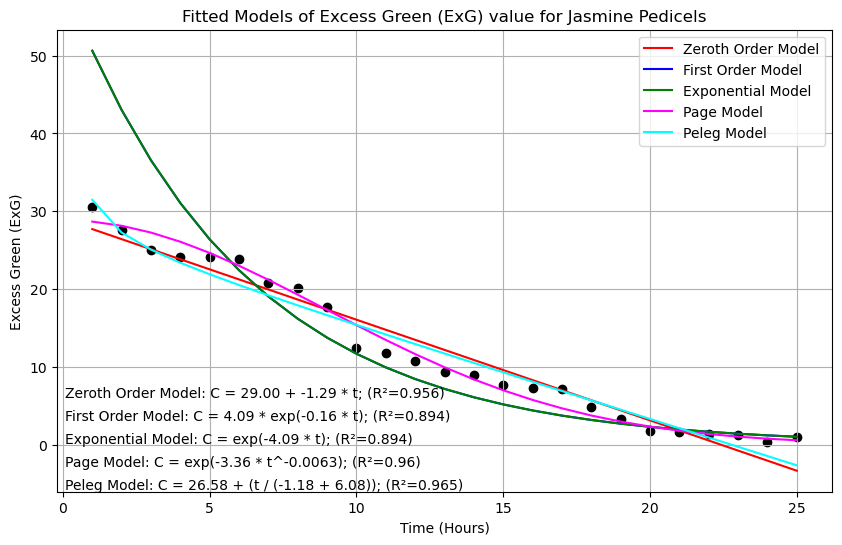

In [18]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(ExG_p, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(ExG_p), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(ExG_p), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(ExG_p), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(ExG_p, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, ExG_p, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Excess Green (ExG) value for Jasmine Pedicels')
plt.xlabel('Time (Hours)')
plt.ylabel('Excess Green (ExG)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.01, 0.005 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ExG_p.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ExG_p_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ExG_p_summary.txt'")


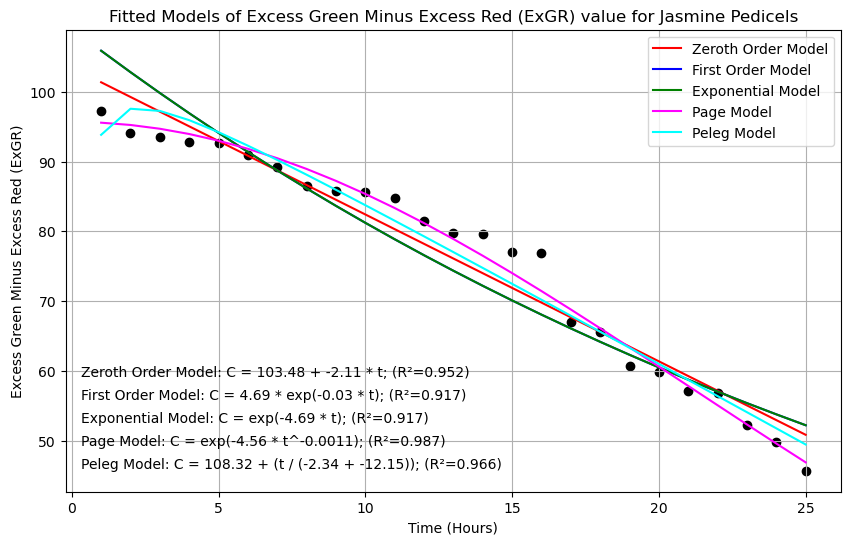

In [19]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(ExGR_p, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(ExGR_p), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(ExGR_p), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(ExGR_p), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(ExGR_p, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, ExGR_p, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Excess Green Minus Excess Red (ExGR) value for Jasmine Pedicels')
plt.xlabel('Time (Hours)')
plt.ylabel('Excess Green Minus Excess Red (ExGR)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ExGR_p.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ExGR_p_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ExGR_p_summary.txt'")


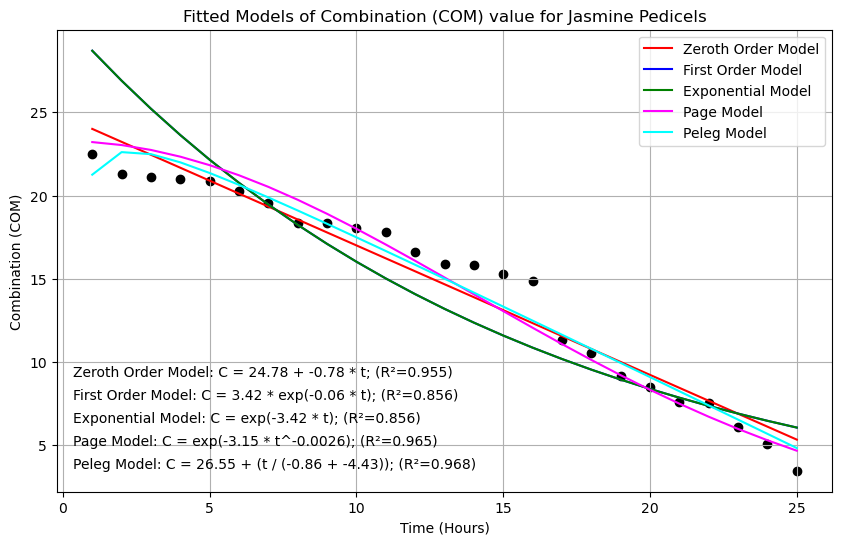

In [20]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(COM_p, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(COM_p), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(COM_p), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(COM_p), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(COM_p, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, COM_p, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Combination (COM) value for Jasmine Pedicels')
plt.xlabel('Time (Hours)')
plt.ylabel('Combination (COM)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/COM_p.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/COM_p_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/COM_p_summary.txt'")


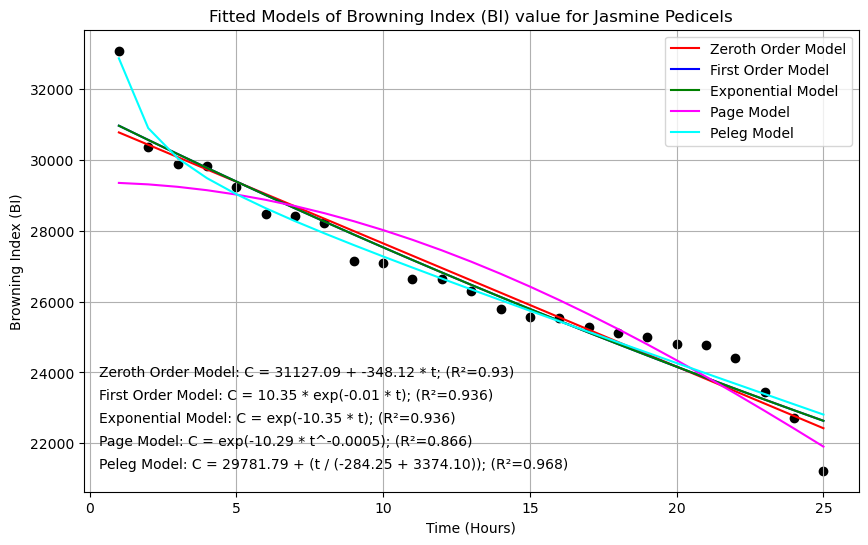

In [29]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(BI_p, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(BI_p), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(BI_p), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(BI_p), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(BI_p, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, BI_p, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Browning Index (BI) value for Jasmine Pedicels')
plt.xlabel('Time (Hours)')
plt.ylabel('Browning Index (BI)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/BI_p.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/BI_p_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/BI_p_summary.txt'")


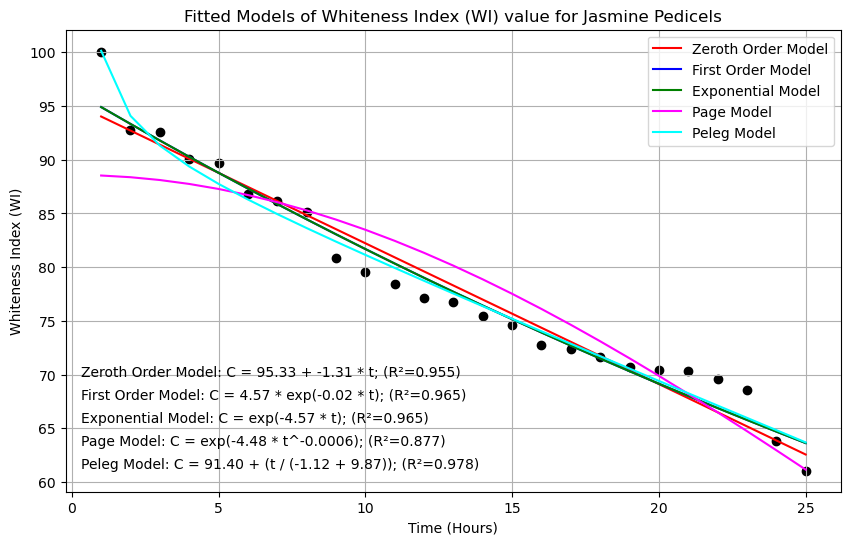

In [30]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(WI_p, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(WI_p), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(WI_p), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(WI_p), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(WI_p, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, WI_p, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Whiteness Index (WI) value for Jasmine Pedicels')
plt.xlabel('Time (Hours)')
plt.ylabel('Whiteness Index (WI)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/WI_p.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/WI_p_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/WI_p_summary.txt'")


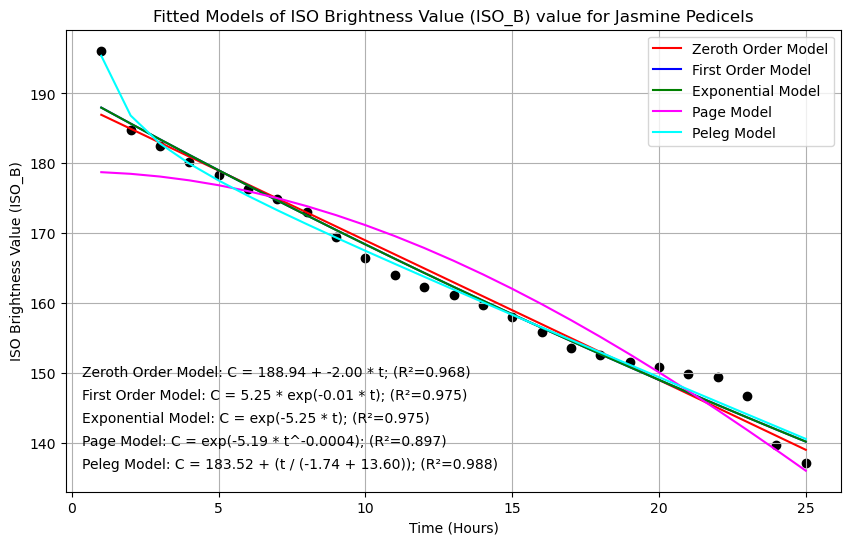

In [23]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(ISO_B_p, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(ISO_B_p), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(ISO_B_p), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(ISO_B_p), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(ISO_B_p, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, ISO_B_p, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of ISO Brightness Value (ISO_B) value for Jasmine Pedicels')
plt.xlabel('Time (Hours)')
plt.ylabel('ISO Brightness Value (ISO_B)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ISO_B_p.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ISO_B_p_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/ISO_B_p_summary.txt'")


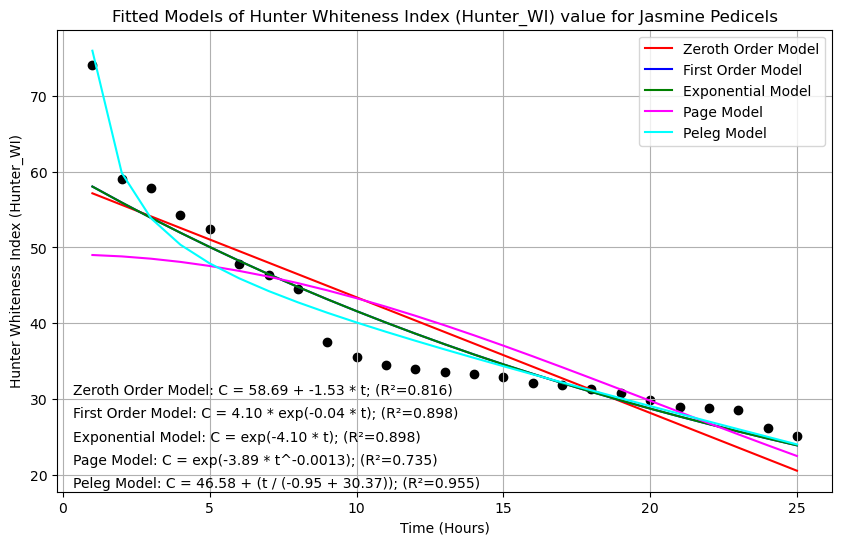

In [24]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(Hunter_WI_p, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(Hunter_WI_p), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(Hunter_WI_p), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(Hunter_WI_p), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(Hunter_WI_p, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, Hunter_WI_p, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Hunter Whiteness Index (Hunter_WI) value for Jasmine Pedicels')
plt.xlabel('Time (Hours)')
plt.ylabel('Hunter Whiteness Index (Hunter_WI)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.01 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Hunter_WI_p.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Hunter_WI_p_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Hunter_WI_p_summary.txt'")


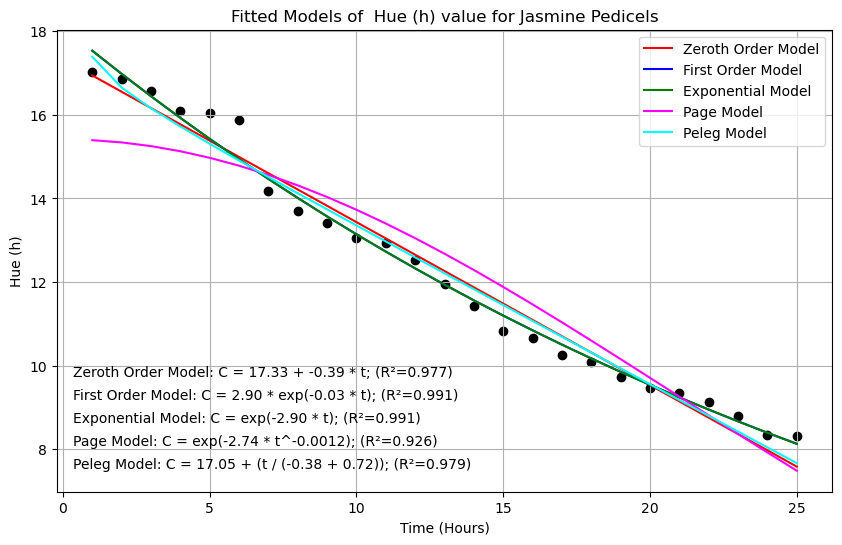

In [25]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(Hue_p, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(Hue_p), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(Hue_p), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(Hue_p), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(Hue_p, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, Hue_p, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of  Hue (h) value for Jasmine Pedicels')
plt.xlabel('Time (Hours)')
plt.ylabel('Hue (h)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)


#plt.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Hue_p.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Hue_p_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Hue_p_summary.txt'")


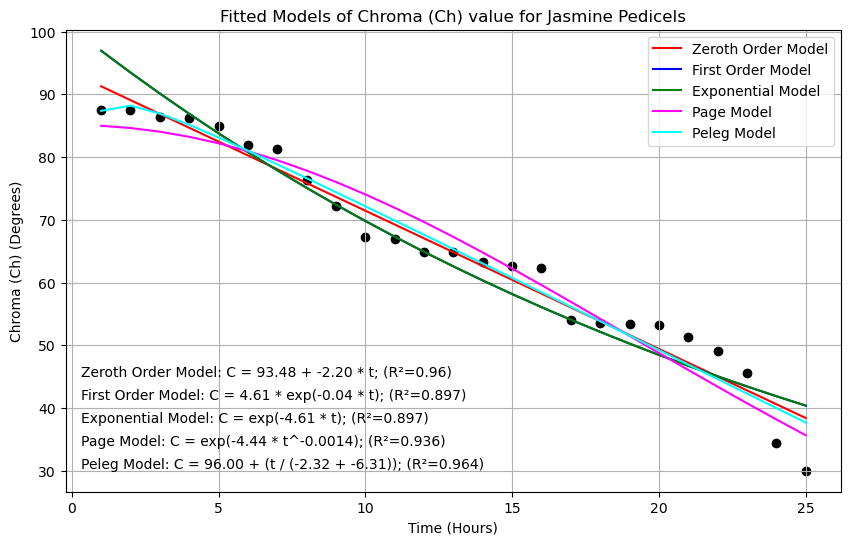

In [26]:
# Fit the Zeroth Order model
zeroth_order_model = sm.OLS(Chrome_deg_p, sm.add_constant(time)).fit()
zeroth_order_equation = f"Zeroth Order Kinetic Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t"
zeroth_order_r2 = zeroth_order_model.rsquared

# Fit the First Order model
first_order_model = sm.OLS(np.log(Chrome_deg_p), sm.add_constant(time)).fit()
first_order_equation = f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t)"
first_order_r2 = first_order_model.rsquared


# Fit the Exponential model
exponential_model = sm.OLS(np.log(Chrome_deg_p), sm.add_constant(time)).fit()
exponential_equation = f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t)"
exponential_r2 = exponential_model.rsquared

# Fit the Page model
page_model = sm.OLS(np.log(Chrome_deg_p), sm.add_constant(time ** 2)).fit()
page_equation = f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.2f})"
page_r2 = page_model.rsquared

# Fit the Peleg model
peleg_model = sm.OLS(Chrome_deg_p, sm.add_constant(np.column_stack((time, 1/time)))).fit()
# Extract parameters from the Peleg model
C0 = peleg_model.params[0]
k0 = peleg_model.params[1]
k1 = peleg_model.params[2]
peleg_equation = f"Peleg Model: C = {C0:.2f} + t / ({k0:.2f} + {k1:.2f})"
peleg_r2 = peleg_model.rsquared

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time, Chrome_deg_p, color='black')#, label='Data')

# Plot Zeroth Order model
plt.plot(time, zeroth_order_model.predict(sm.add_constant(time)), label='Zeroth Order Model', color='red')

# Plot First Order model
plt.plot(time, np.exp(first_order_model.predict(sm.add_constant(time))), label='First Order Model', color='blue')

# Plot Exponential model
plt.plot(time, np.exp(exponential_model.predict(sm.add_constant(time))), label='Exponential Model', color='green')

# Plot Page model
plt.plot(time, np.exp(page_model.predict(sm.add_constant(time ** 2))), label='Page Model', color='magenta')

# Plot Peleg model
plt.plot(time, peleg_model.predict(sm.add_constant(np.column_stack((time, 1/time)))), label='Peleg Model', color='cyan')

plt.title('Fitted Models of Chroma (Ch) value for Jasmine Pedicels')
plt.xlabel('Time (Hours)')
plt.ylabel('Chroma (Ch) (Degrees)')
plt.legend()
plt.grid(True)

# Add equations to the bottom left
equations = [
    f"Peleg Model: C = {C0:.2f} + (t / ({k0:.2f} + {k1:.2f})); (R\u00B2={round(peleg_r2, 3)})",
    f"Page Model: C = exp({-page_model.params[0]:.2f} * t^{page_model.params[1]:.4f}); (R\u00B2={round(page_r2, 3)})",
    f"Exponential Model: C = exp({-exponential_model.params[0]:.2f} * t); (R\u00B2={round(exponential_r2, 3)})",
    f"First Order Model: C = {first_order_model.params[0]:.2f} * exp({first_order_model.params[1]:.2f} * t); (R\u00B2={round(first_order_r2,3)})",
    f"Zeroth Order Model: C = {zeroth_order_model.params[0]:.2f} + {zeroth_order_model.params[1]:.2f} * t; (R\u00B2={round(zeroth_order_r2, 3)})"
  
]
for i, equation in enumerate(equations):
    plt.text(0.02, 0.05 + i * 0.05, equation, transform=plt.gca().transAxes)

# plot.show()

# Save the plot
plt.savefig('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Chrome_deg_p.png')

# Print and save the model summaries
with open('C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Chrome_deg_p_summary.txt', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    
    # Print the summaries
    print(zeroth_order_model.summary())
    print("Zeroth Order Model Equation:", zeroth_order_equation)

    print(first_order_model.summary())
    print("First Order Model Equation:", first_order_equation)

    print(exponential_model.summary())
    print("Exponential Model Equation:", exponential_equation)

    print(page_model.summary())
    print("Page Model Equation:", page_equation)

    print(peleg_model.summary())
    print("Peleg Model Equation:", peleg_equation)

# Reset stdout to the original value
sys.stdout = sys.__stdout__

print("Summary saved to 'C:/Users/tazee/OneDrive/Documents/Laptop/Article/Jasmine/Chrome_deg_p_summary.txt'")
